In [43]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path= '/content/drive/My Drive/shap_experiment/data'
df_processed_combined_data_daily = pd.read_csv(file_path+"/processed_combined_data_daily.csv")
df_processed_combined_data_daily_imputed_with_neighbors = pd.read_csv(file_path+"/processed_combined_imputed_with_neighbors_df_processed_combined_data_daily.csv")

df_processed_combined_data_daily.DateTime = pd.to_datetime(df_processed_combined_data_daily.DateTime)
df_processed_combined_data_daily_imputed_with_neighbors.DateTime = pd.to_datetime(df_processed_combined_data_daily_imputed_with_neighbors.DateTime)

Mounted at /content/drive


In [3]:
df_processed_combined_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        2179 non-null   datetime64[ns]
 1   wind_speed      1461 non-null   float64       
 2   wind_direction  1454 non-null   float64       
 3   precipitation   2165 non-null   float64       
 4   pressure        2178 non-null   float64       
 5   temperature     2179 non-null   float64       
 6   humidity        2165 non-null   float64       
 7   visibility      2178 non-null   float64       
 8   cloudiness      2178 non-null   float64       
 9   Bjelave_PM10    1770 non-null   float64       
 10  Bjelave_SO2     1031 non-null   float64       
 11  Bjelave_NO2     1751 non-null   float64       
 12  Bjelave_O3      1658 non-null   float64       
 13  Bjelave_CO      1065 non-null   float64       
 14  Ilidža_PM2.5    1231 non-null   float64       
 15  Ilid

In [4]:
# Ensure DateTime column is in datetime format
df_processed_combined_data_daily['DateTime'] = pd.to_datetime(df_processed_combined_data_daily['DateTime'], dayfirst=True)  # dayfirst=True if your dates are in DD.MM.YYYY format

In [5]:
df_processed_combined_data_daily.isnull().sum()

,0
DateTime,0
wind_speed,718
wind_direction,725
precipitation,14
pressure,1
temperature,0
humidity,14
visibility,1
cloudiness,1
Bjelave_PM10,409


In [7]:
df_processed_combined_data_daily.describe(include='all')

,DateTime,wind_speed,wind_direction,precipitation,pressure,temperature,humidity,visibility,cloudiness,Bjelave_PM10,...,Ilidža_O3,Vijećnica_PM10,Vijećnica_SO2,Vijećnica_NO2,Vijećnica_CO,Otoka_PM10,Otoka_SO2,Otoka_NO2,Otoka_O3,Ambasada_PM2.5
count,2179,1461.000000,1454.000000,2165.000000,2178.000000,2179.000000,2165.000000,2178.000000,2178.000000,1770.000000,...,875.000000,1312.000000,1560.000000,1583.000000,1364.000000,1718.000000,1707.000000,1719.000000,1729.000000,1630.000000
mean,2020-12-25 00:00:00,1.855326,187.081891,0.125006,943.400978,11.621358,67.851992,16117.841456,4.481947,39.262175,...,31.001008,35.986101,13.261818,21.900504,0.657256,51.605229,23.966773,36.953554,30.461240,36.466675
min,2018-01-01 00:00:00,0.375000,75.869565,0.000000,917.695833,-9.554167,22.583333,255.000000,0.000000,2.206643,...,0.244000,0.999990,-0.303750,0.450000,-0.014348,4.545455,0.766965,5.359414,0.610833,2.791667
25%,2019-06-29 12:00:00,1.370833,160.968750,0.000000,939.505208,5.177083,57.333333,14458.333333,2.300000,19.820716,...,13.576072,18.470192,4.867187,14.207083,0.250312,22.569746,10.039354,25.187102,15.299583,13.541667
50%,2020-12-25 00:00:00,1.816667,183.583333,0.000000,943.517029,12.170833,67.791667,18129.166667,4.827083,28.638063,...,26.613864,26.147009,9.592083,18.328333,0.420000,33.083333,18.370717,33.319338,28.174167,20.104167
75%,2022-06-22 12:00:00,2.247826,209.947917,0.100000,947.270516,18.112500,78.750000,18812.500000,6.698958,42.243279,...,38.768958,37.686844,17.514167,26.027500,0.918958,59.458333,31.856414,43.975385,41.957500,37.583333
max,2023-12-19 00:00:00,5.720833,317.583333,3.673684,968.000000,29.537500,100.000000,20000.000000,8.000000,486.234628,...,272.438250,395.955999,141.110417,107.155417,7.117500,421.833333,150.203708,123.765896,131.065001,476.083333
std,NaN,0.696712,40.346244,0.301308,6.942886,8.114297,14.906403,4070.378997,2.503976,39.538844,...,27.882650,36.737921,12.994571,12.617951,0.662767,51.623567,19.226377,17.418296,18.737884,46.938583


In [8]:
feature_columns=['DateTime', 'Bjelave_PM10','wind_speed','wind_direction','precipitation','pressure', 'temperature','humidity','visibility','cloudiness','Bjelave_SO2','Bjelave_NO2']
df_processed_combined_data_daily[feature_columns].describe()

,DateTime,Bjelave_PM10,wind_speed,wind_direction,precipitation,pressure,temperature,humidity,visibility,cloudiness,Bjelave_SO2,Bjelave_NO2
count,2179,1770.000000,1461.000000,1454.000000,2165.000000,2178.000000,2179.000000,2165.000000,2178.000000,2178.000000,1031.000000,1751.000000
mean,2020-12-25 00:00:00,39.262175,1.855326,187.081891,0.125006,943.400978,11.621358,67.851992,16117.841456,4.481947,14.540061,19.460646
min,2018-01-01 00:00:00,2.206643,0.375000,75.869565,0.000000,917.695833,-9.554167,22.583333,255.000000,0.000000,0.588175,2.252868
25%,2019-06-29 12:00:00,19.820716,1.370833,160.968750,0.000000,939.505208,5.177083,57.333333,14458.333333,2.300000,4.415428,11.380406
50%,2020-12-25 00:00:00,28.638063,1.816667,183.583333,0.000000,943.517029,12.170833,67.791667,18129.166667,4.827083,9.122092,15.699687
75%,2022-06-22 12:00:00,42.243279,2.247826,209.947917,0.100000,947.270516,18.112500,78.750000,18812.500000,6.698958,18.308281,24.269484
max,2023-12-19 00:00:00,486.234628,5.720833,317.583333,3.673684,968.000000,29.537500,100.000000,20000.000000,8.000000,166.777405,105.087328
std,NaN,39.538844,0.696712,40.346244,0.301308,6.942886,8.114297,14.906403,4070.378997,2.503976,17.269619,12.492042


In [12]:
means = df_processed_combined_data_daily[feature_columns].mean()
medians = df_processed_combined_data_daily[feature_columns].median()
modes = df_processed_combined_data_daily[feature_columns].mode()
stds = df_processed_combined_data_daily[feature_columns].std()

#var = df_processed_combined_data_daily[feature_columns].var()
df_processed_combined_data_daily_mean_median_std= pd.DataFrame({'mean': mean, 'median': median, 'std': std})

df_processed_combined_data_daily_mean_median_std

,mean,median,std
DateTime,2020-12-25 00:00:00,2020-12-25 00:00:00,629 days 04:01:06.754925896
Bjelave_PM10,39.262175,28.638063,39.538844
wind_speed,1.855326,1.816667,0.696712
wind_direction,187.081891,183.583333,40.346244
precipitation,0.125006,0.0,0.301308
pressure,943.400978,943.517029,6.942886
temperature,11.621358,12.170833,8.114297
humidity,67.851992,67.791667,14.906403
visibility,16117.841456,18129.166667,4070.378997
cloudiness,4.481947,4.827083,2.503976


In [10]:
pollutants =['Bjelave_PM10', 'Bjelave_SO2', 'Bjelave_NO2']

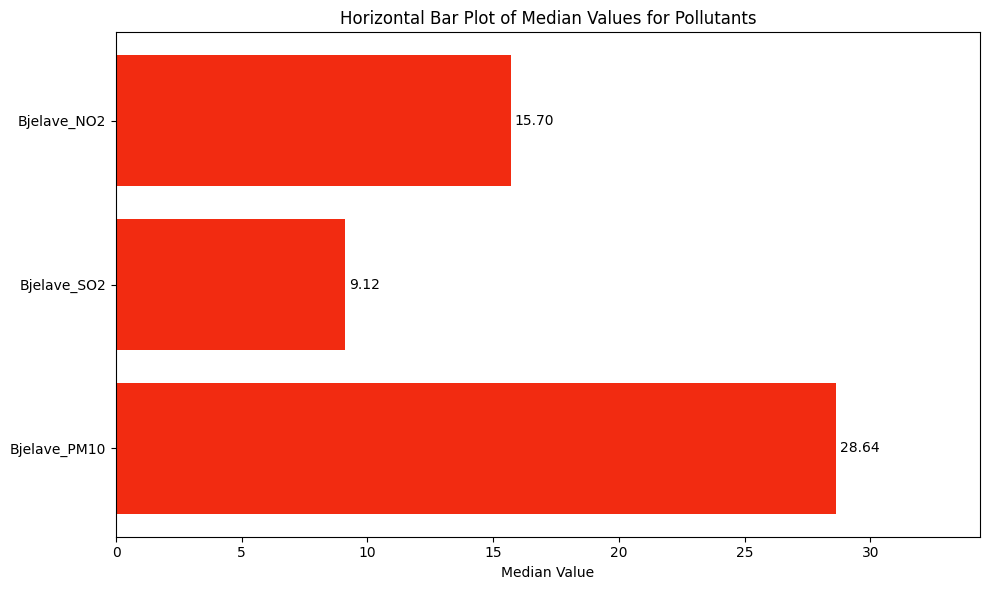

In [14]:
import matplotlib.pyplot as plt

medians = df_processed_combined_data_daily[pollutants].median()
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(medians.index, medians.values, color='#f22b11')

ax.bar_label(bars, fmt='%.2f', padding=3)
ax.set_xlabel("Median Value")
ax.set_title("Horizontal Bar Plot of Median Values for Pollutants")

ax.set_xlim(0, medians.max() * 1.2)

plt.tight_layout()
plt.show()

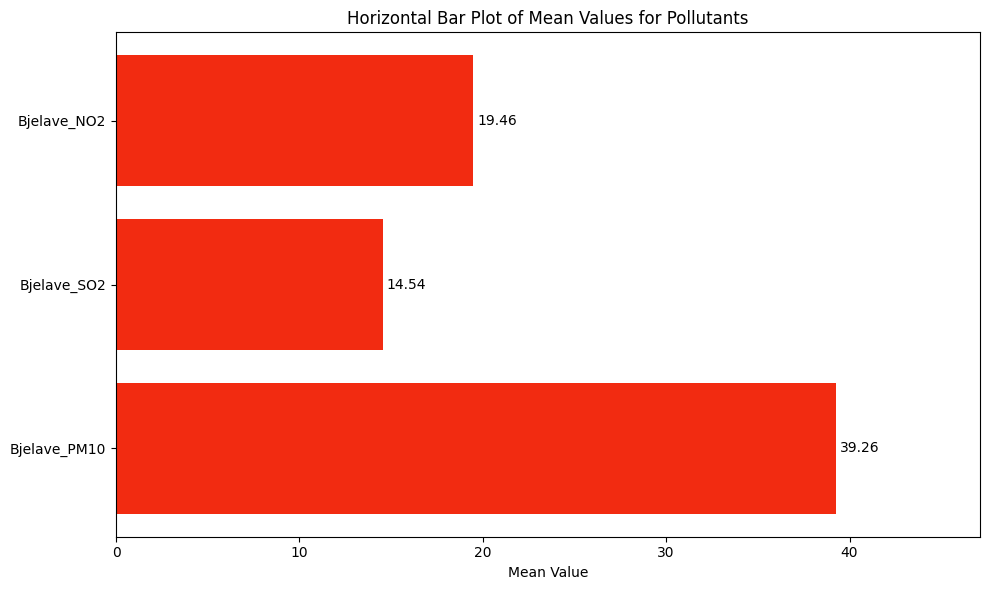

In [17]:
means = df_processed_combined_data_daily[pollutants].mean()

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(means.index, means.values, color='#f22b11')

ax.bar_label(bars, fmt='%.2f', padding=3)

ax.set_xlabel("Mean Value")
ax.set_title("Horizontal Bar Plot of Mean Values for Pollutants")

ax.set_xlim(0, means.max() * 1.2)

plt.tight_layout()
plt.show()

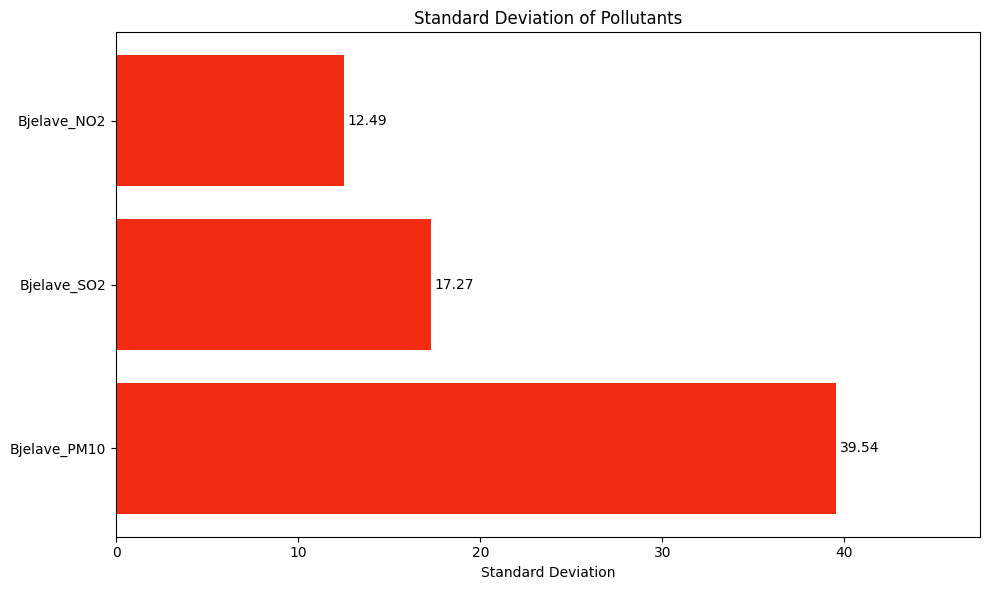

In [19]:
stds = df_processed_combined_data_daily[pollutants].std()


fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(stds.index, stds.values, color='#f22b11')

ax.bar_label(bars, fmt='%.2f', padding=3)

ax.set_xlabel("Standard Deviation")
ax.set_title("Standard Deviation of Pollutants")

ax.set_xlim(0, stds.max() * 1.2)

plt.tight_layout()
plt.show()

In [26]:
feature_columns

['DateTime',
 'Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

In [74]:
feature_columns.remove('DateTime')
var = df_processed_combined_data_daily[feature_columns].var()

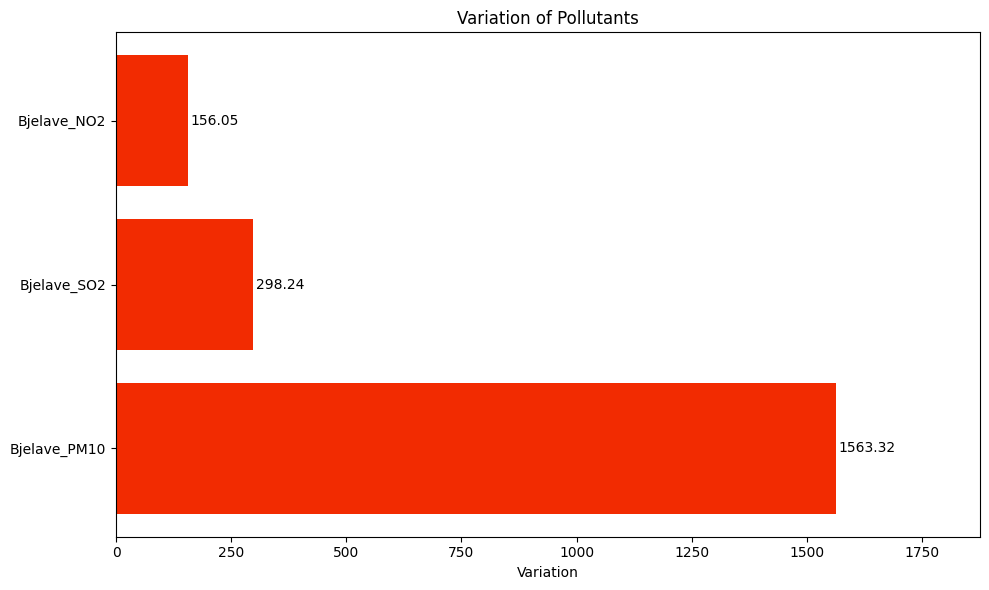

In [81]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(var[pollutants].index, var[pollutants].values, color='#f22b01')

ax.bar_label(bars, fmt='%.2f', padding=2)

ax.set_xlabel("Variation")
ax.set_title("Variation of Pollutants")

ax.set_xlim(0, var[pollutants].max() * 1.2)

plt.tight_layout()
plt.show()

In [82]:
feature_columns.insert(0,'DateTime')
var = pd.DataFrame({'var': var})
feature_columns.insert(0,'DateTime')
var

,var
Bjelave_PM10,1.563320e+03
wind_speed,4.854077e-01
wind_direction,1.627819e+03
precipitation,9.078670e-02
pressure,4.820367e+01
temperature,6.584181e+01
humidity,2.222009e+02
visibility,1.656799e+07
cloudiness,6.269896e+00
Bjelave_SO2,2.982398e+02


In [33]:
min = df_processed_combined_data_daily[feature_columns].min()
max = df_processed_combined_data_daily[feature_columns].max()
range = max-min

df_processed_combined_data_daily_min_max_range = pd.DataFrame({'min': min, 'max': max, 'range': range})

df_processed_combined_data_daily_min_max_range

,min,max,range
DateTime,2018-01-01 00:00:00,2023-12-19 00:00:00,2178 days 00:00:00
Bjelave_PM10,2.206643,486.234628,484.027985
wind_speed,0.375,5.720833,5.345833
wind_direction,75.869565,317.583333,241.713768
precipitation,0.0,3.673684,3.673684
pressure,917.695833,968.0,50.304167
temperature,-9.554167,29.5375,39.091667
humidity,22.583333,100.0,77.416667
visibility,255.0,20000.0,19745.0
cloudiness,0.0,8.0,8.0


In [34]:
def plot_data(df, label, color='#0F5257'):
    plt.figure(figsize=(15,8))
    plt.plot(df['DateTime'], df[label], color=color, label=label)
    #plt.plot(test_data[date_column], test_data[label], color='orange', label='Test Data')
    plt.xlabel('DateTime')
    plt.ylabel(label)
    plt.title(label)
    plt.legend()
    plt.show()

In [35]:
colors = [
    '#0F5257',         # for Bjelave_PM10
    'blue',
    'lightblue',
    'green',
    'darkgreen',
    'darkorange',
    'purple',
    'pink',
    '#D1B1C8',
    '#9B9FB5',
    '#7A6174'
]

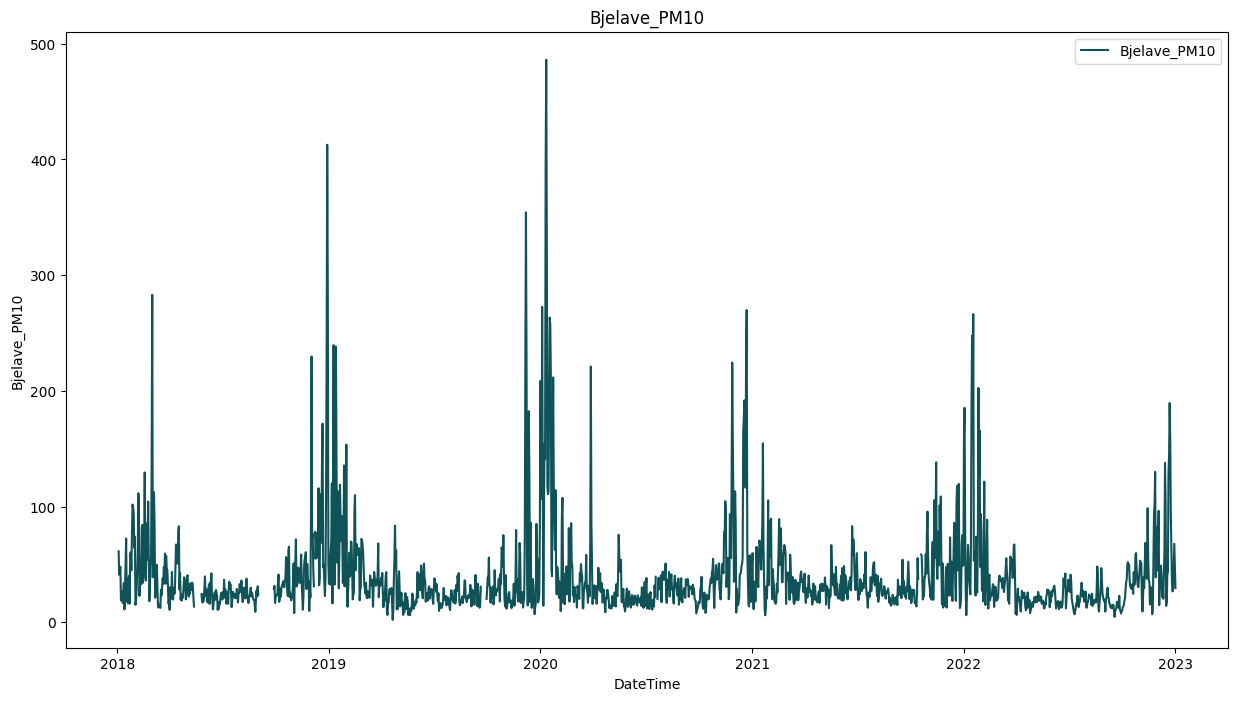

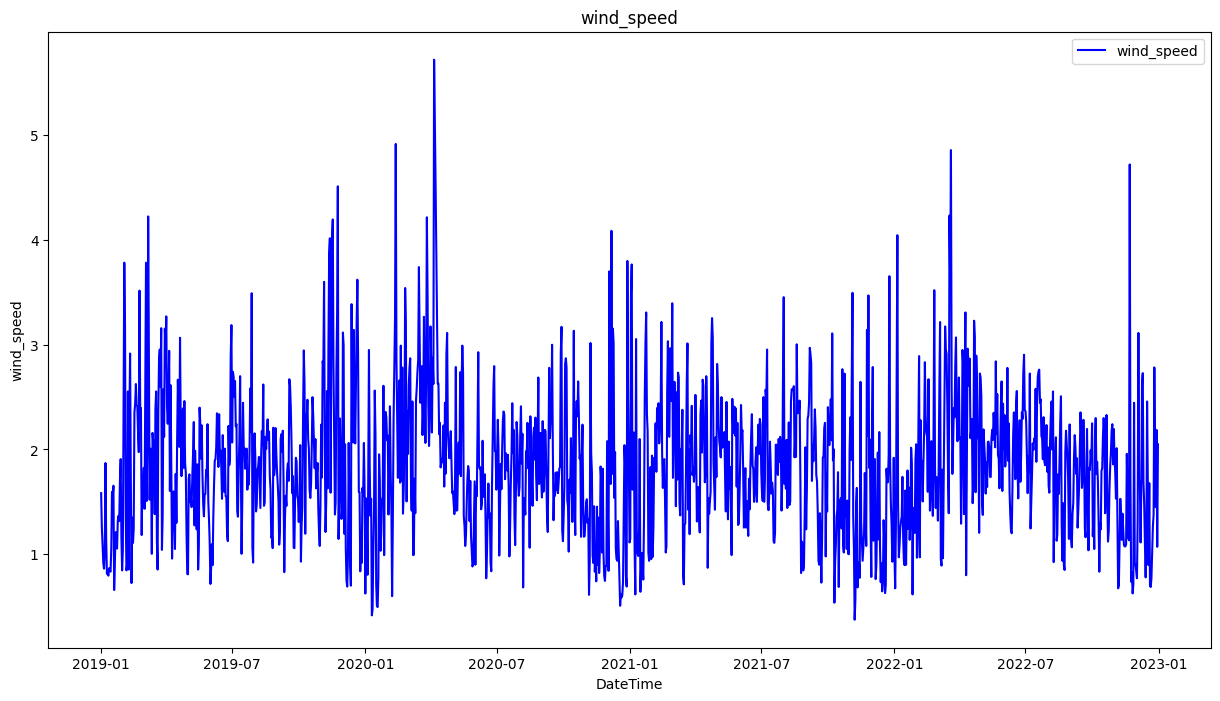

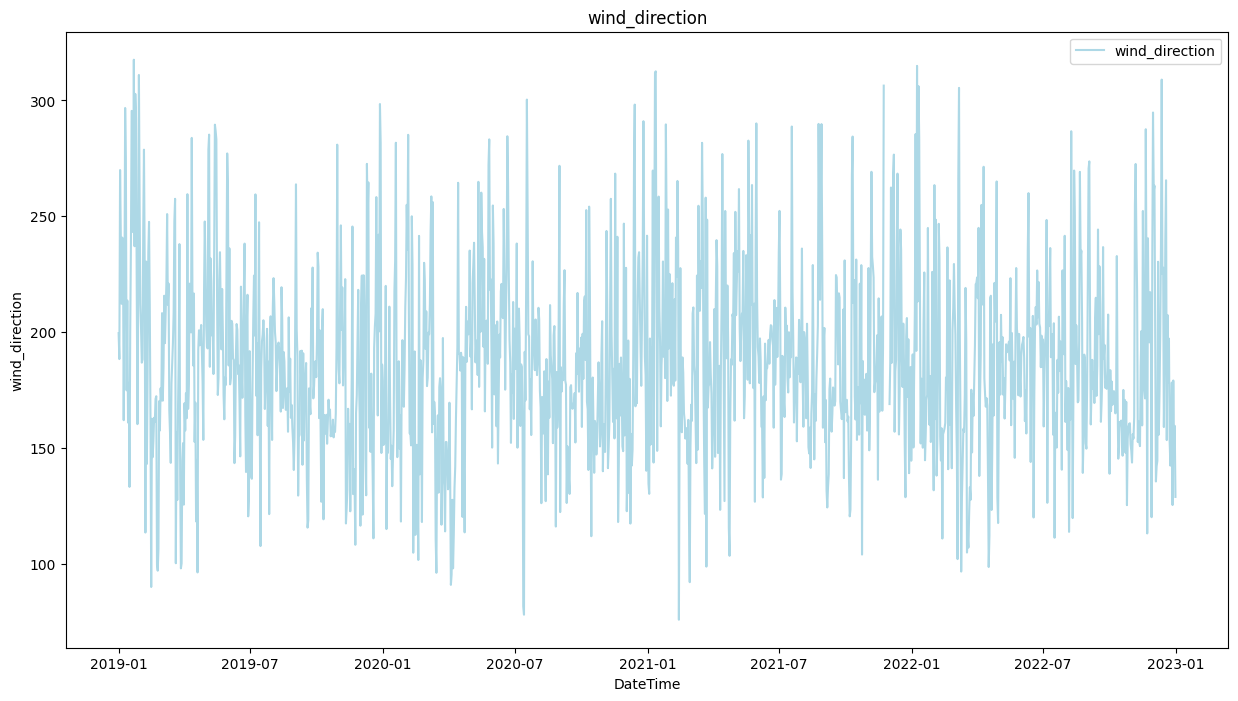

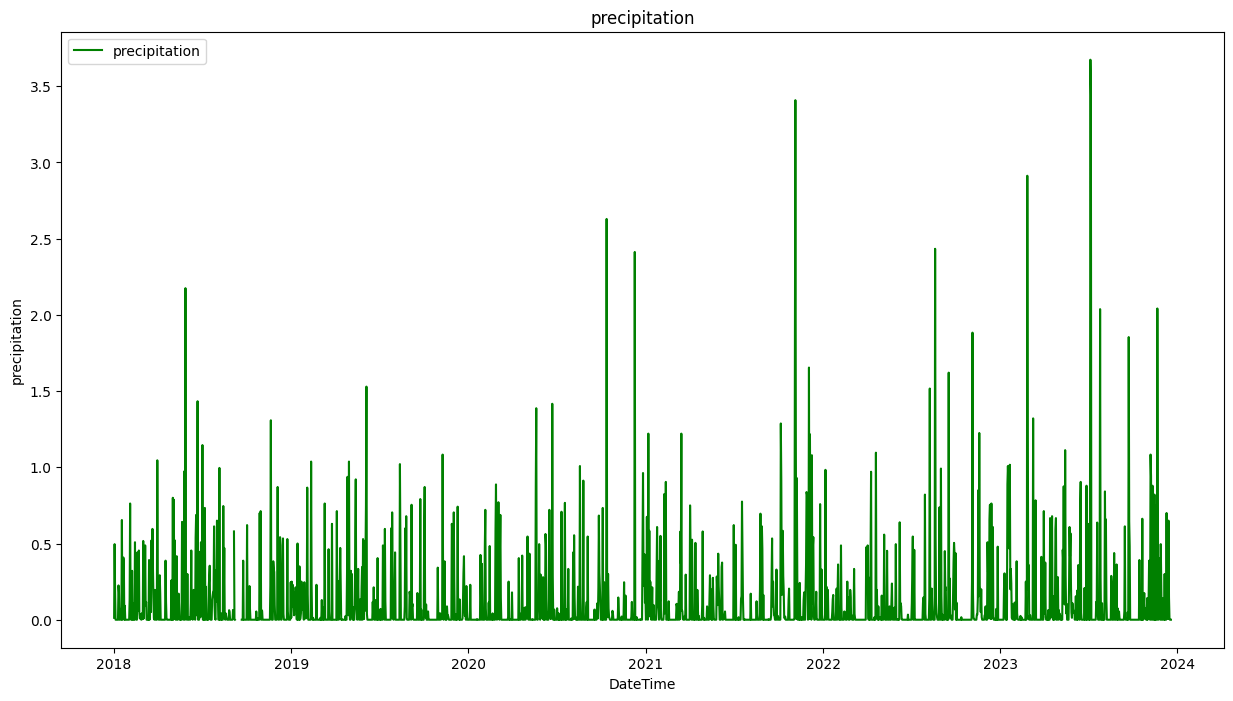

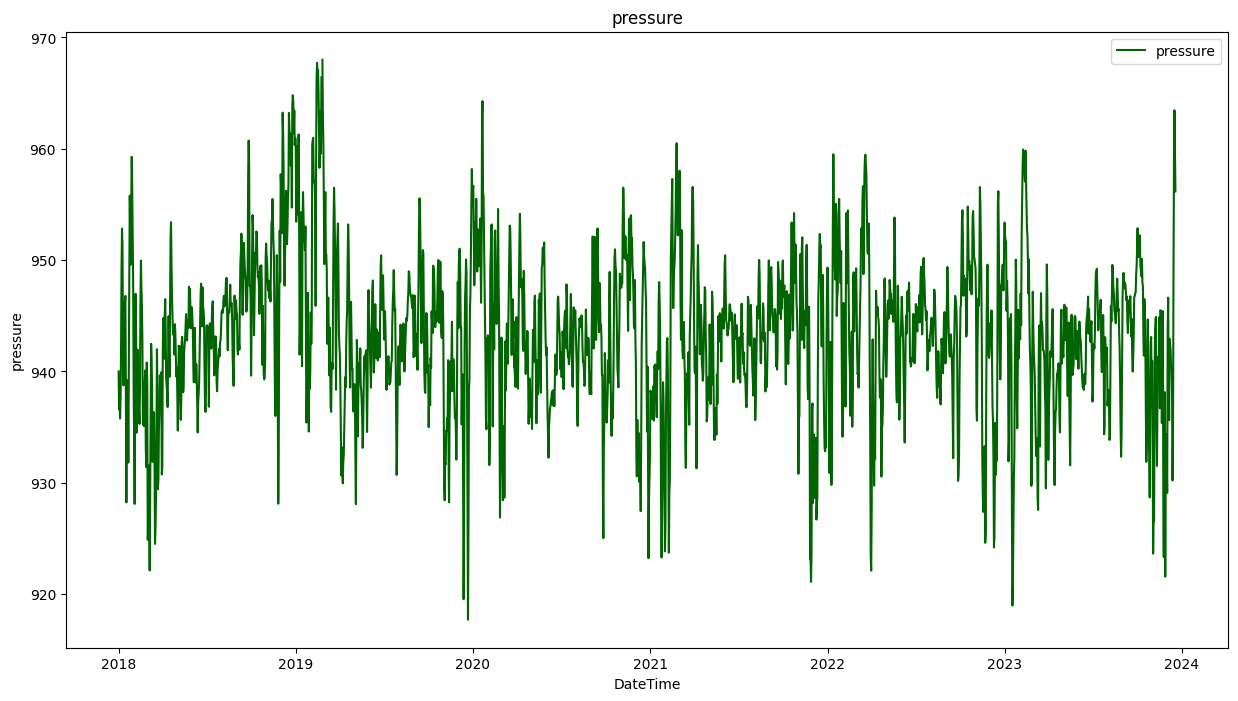

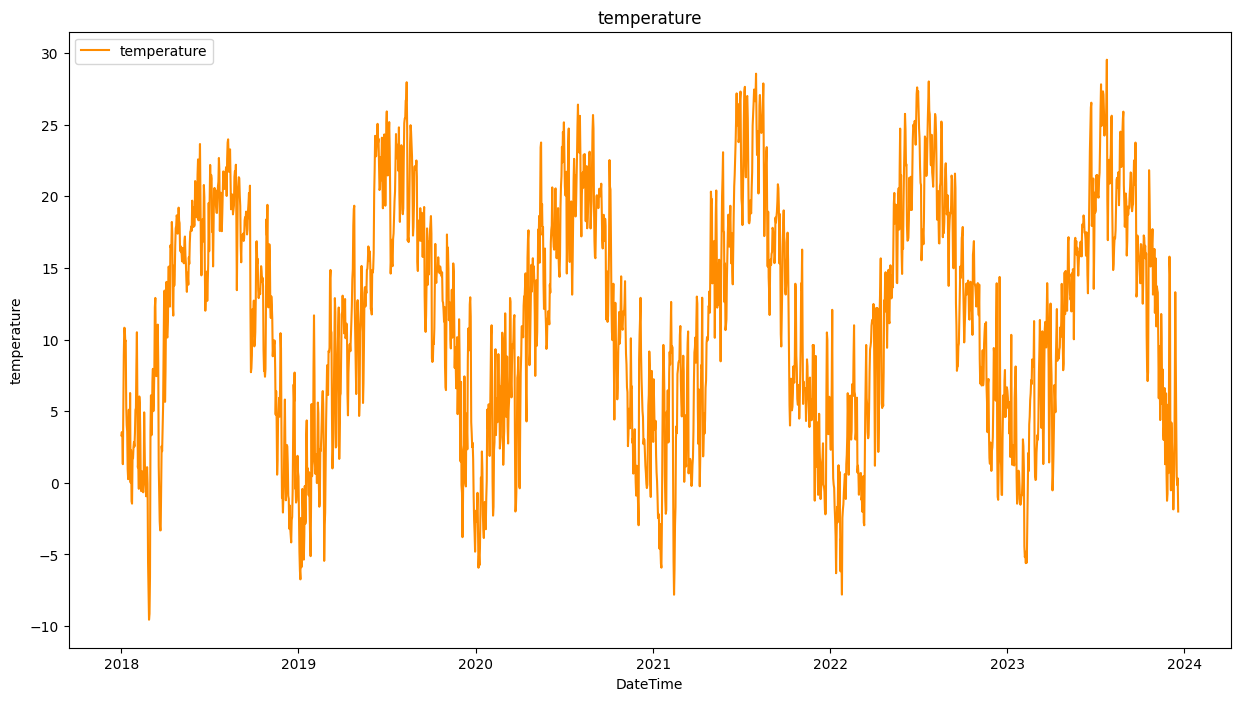

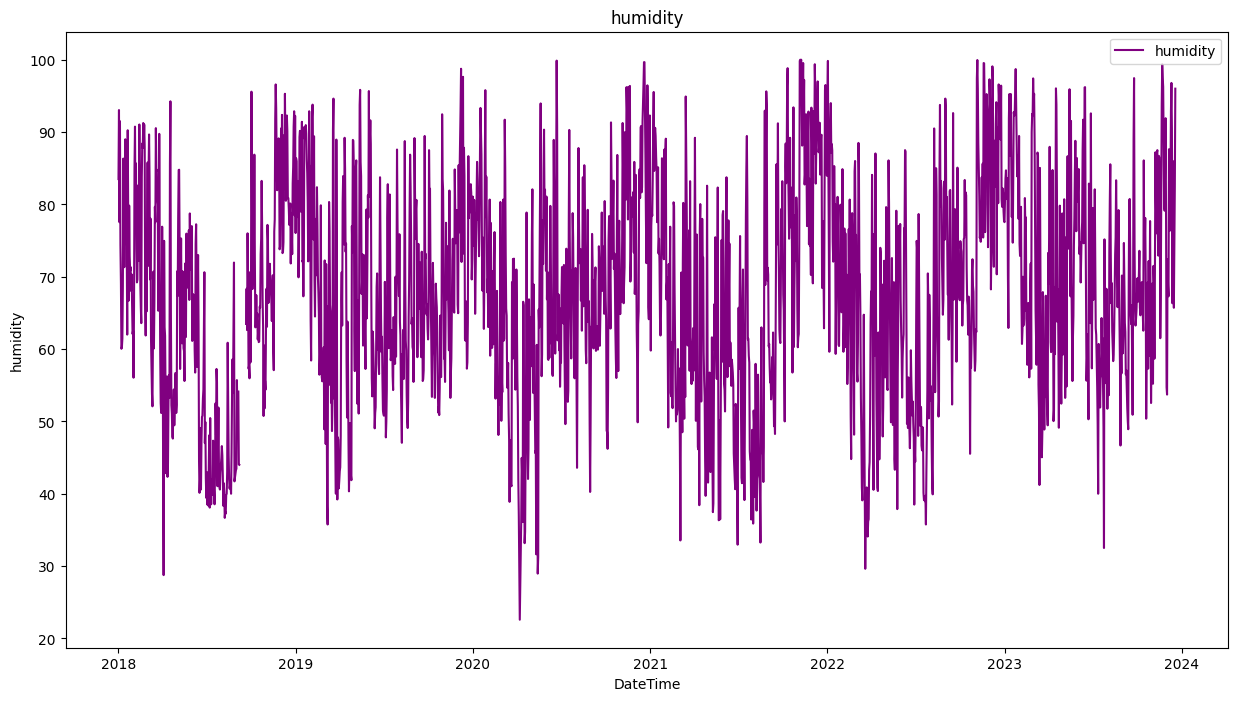

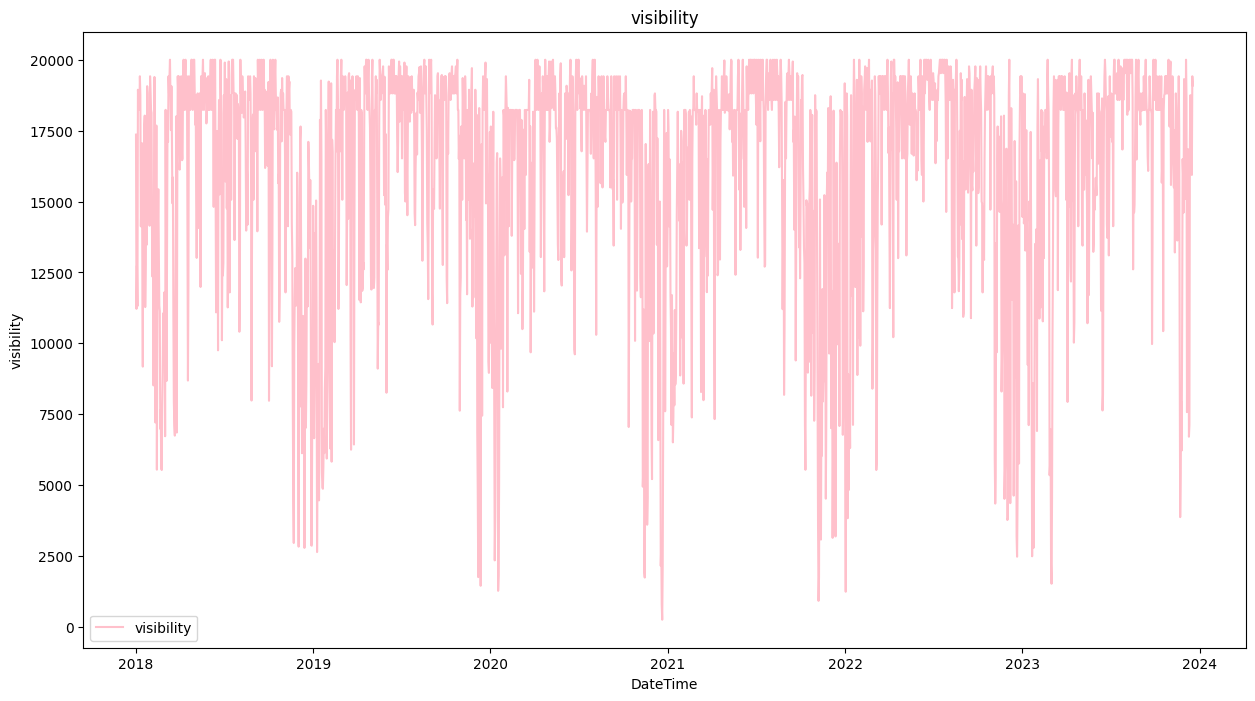

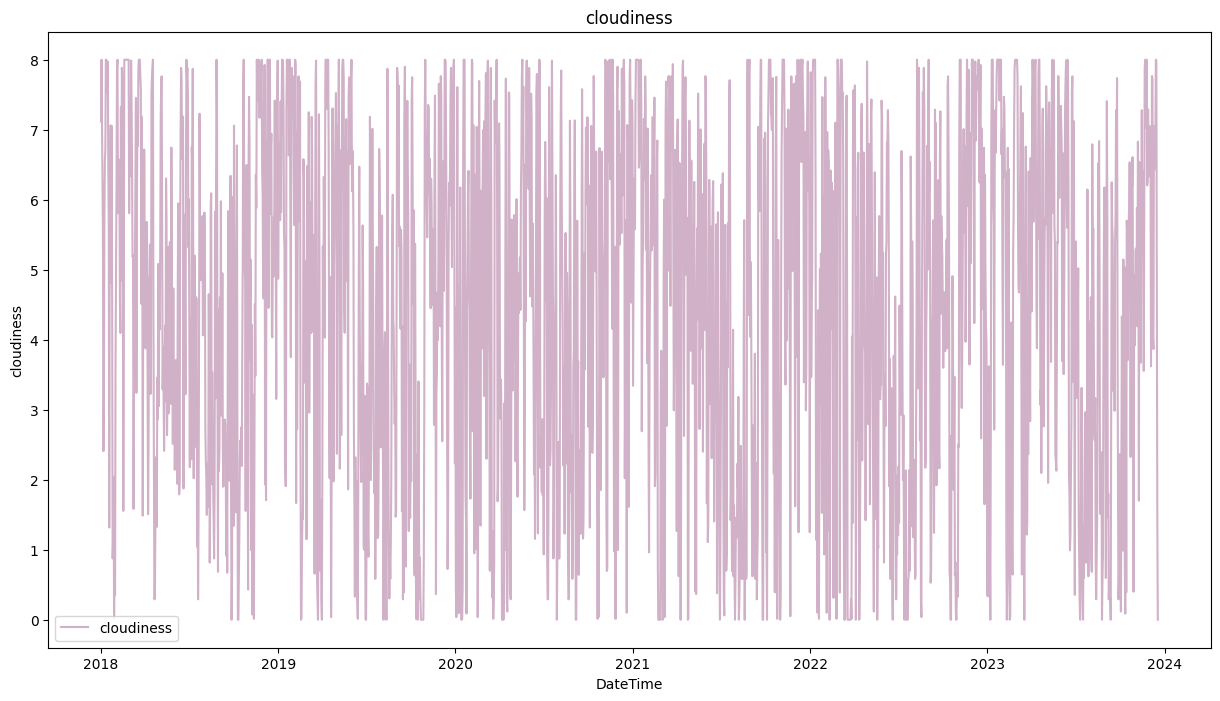

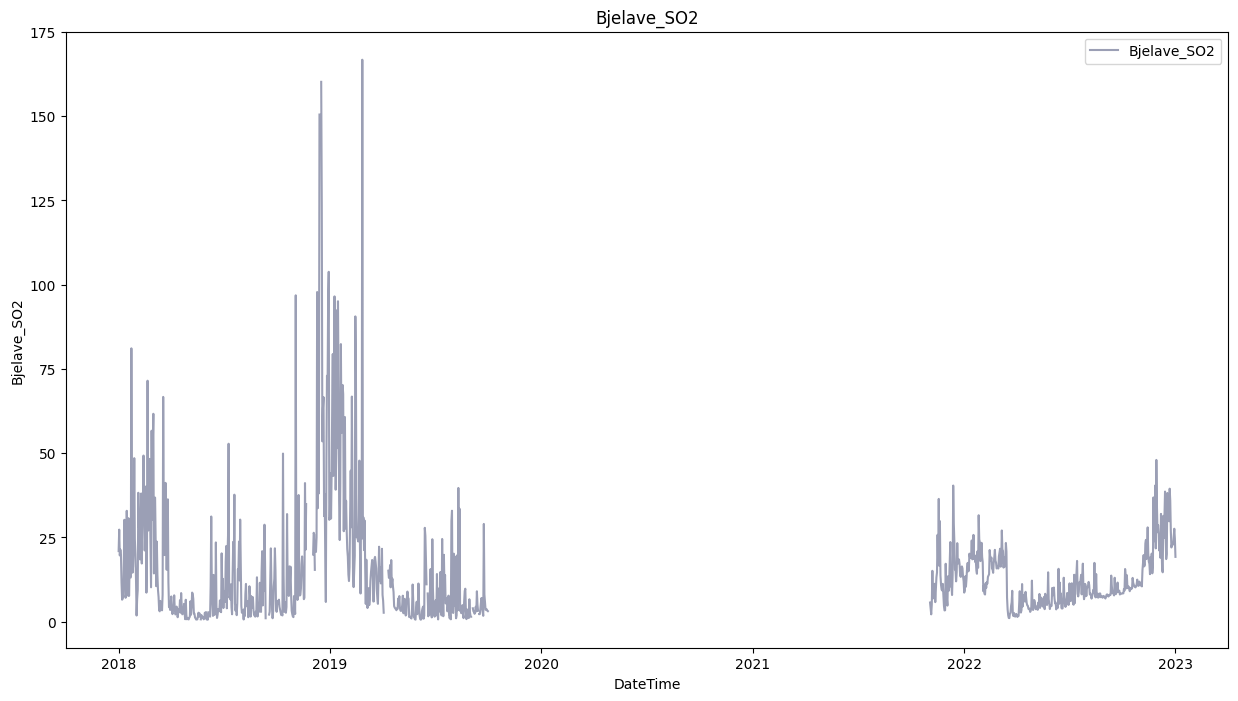

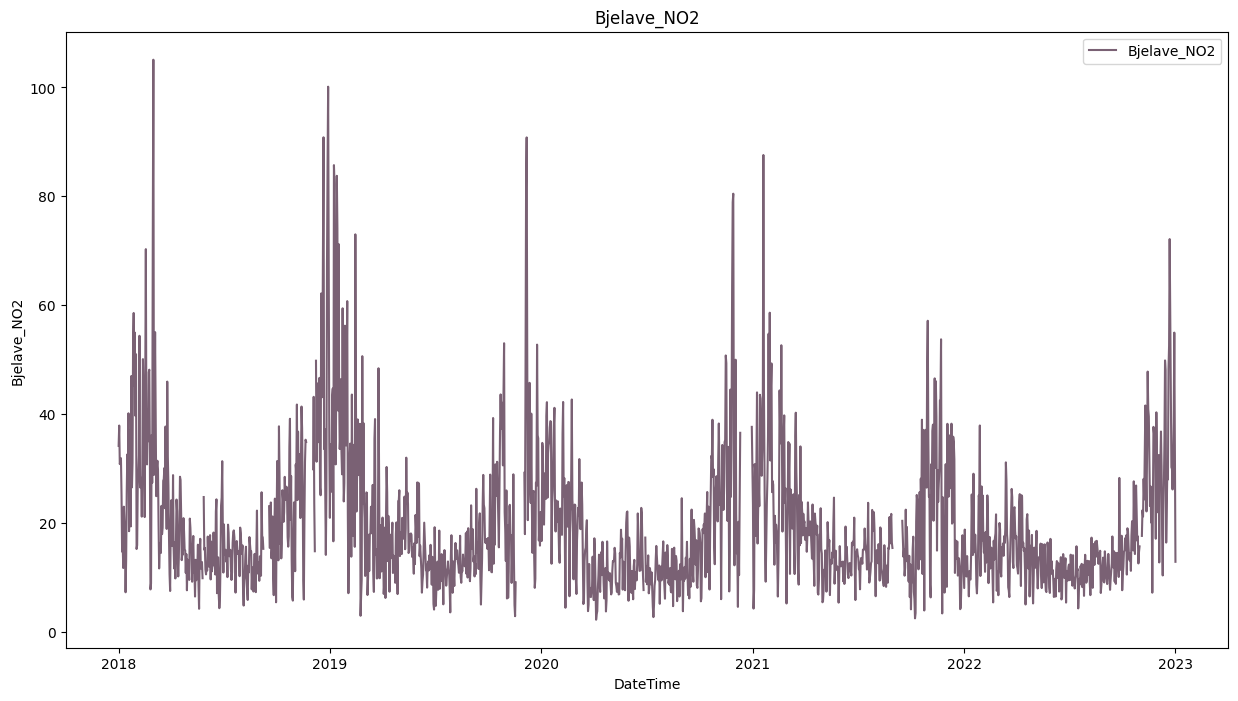

In [36]:
feature_columns.remove('DateTime')
for col, color in zip(feature_columns, colors):
        plot_data(df=df_processed_combined_data_daily, label=col, color=color)
feature_columns.insert(0,'DateTime')

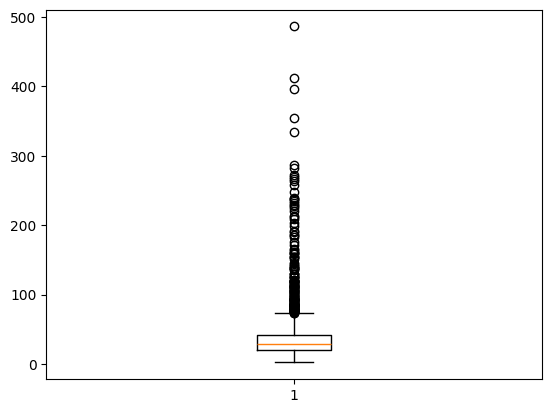

In [37]:
import matplotlib.pyplot as plt

plt.boxplot(df_processed_combined_data_daily_imputed_with_neighbors['Bjelave_PM10'])

plt.show()

In [62]:
def scatter_plot_data(df, label, color='#0F5257'):
    #plt.figure(figsize=(10,5))
    #plt.scatter(df['DateTime'], df[label], color=color, label=label)
    #plt.plot(test_data[date_column], test_data[label], color='orange', label='Test Data')
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.scatter(df['DateTime'], df[label], c=df[label], cmap='Spectral')
    plt.colorbar()
    plt.xlabel('DateTime')
    plt.ylabel(label)
    plt.title(label)
    plt.show()

def simple_scatter_plot_data(df, label, color='#0F5257'):
    #plt.figure(figsize=(10,8))
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.scatter(df['DateTime'], df[label], color=color, label=label)
    #plt.plot(test_data[date_column], test_data[label], color='orange', label='Test Data')
    plt.xlabel('DateTime')
    plt.ylabel(label)
    plt.title(label)
    plt.legend()
    plt.show()

def correlation_plot(df, label1='Bjelave_PM10', label2='wind_speed',label3='pressure', label4=''):
    #plt.figure(figsize=(10,8))
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.scatter(df[label1], df[label2], label=''+label2+f' – correlation with {label1} = {np.round(np.corrcoef(df[label1],df[label2])[0,1], 2)}', alpha=0.5)
    plt.scatter(df[label1], df[label3], label=''+label3+f' – correlation with {label1} = {np.round(np.corrcoef(df[label1],df[label3])[0,1], 2)}', alpha=0.4)
    if(label4!=''):
      plt.scatter(df[label1], df[label4], label=''+label4+f' – correlation with {label1} = {np.round(np.corrcoef(df[label1],df[label4])[0,1], 2)}', alpha=0.45)
    plt.xlabel('DateTime')
    plt.title('Scatterplot and Correlations')
    plt.legend()
    plt.show()

In [58]:
feature_columns.remove('DateTime')
for feature in feature_columns:
  scatter_plot_data(df_processed_combined_data_daily, feature)
feature_columns.insert(0,'DateTime')

Output hidden; open in https://colab.research.google.com to view.

In [54]:
feature_columns

['DateTime',
 'Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

In [41]:
df_processed_combined_data_daily_imputed_with_neighbors.columns

Index(['DateTime', 'wind_speed', 'wind_direction', 'precipitation', 'pressure',
       'temperature', 'humidity', 'visibility', 'cloudiness', 'Bjelave_PM10',
       'Bjelave_SO2', 'Bjelave_NO2'],
      dtype='object')

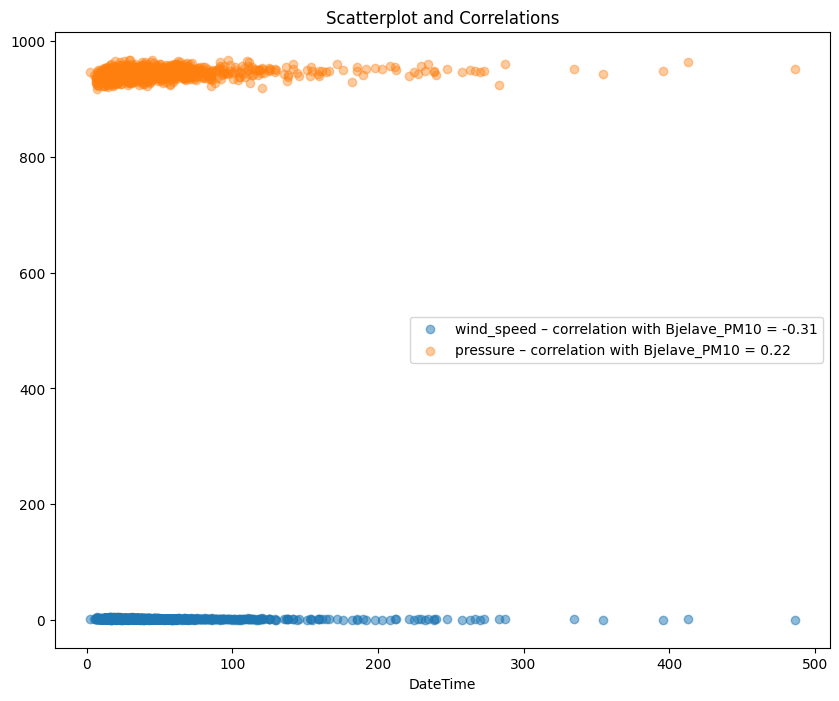

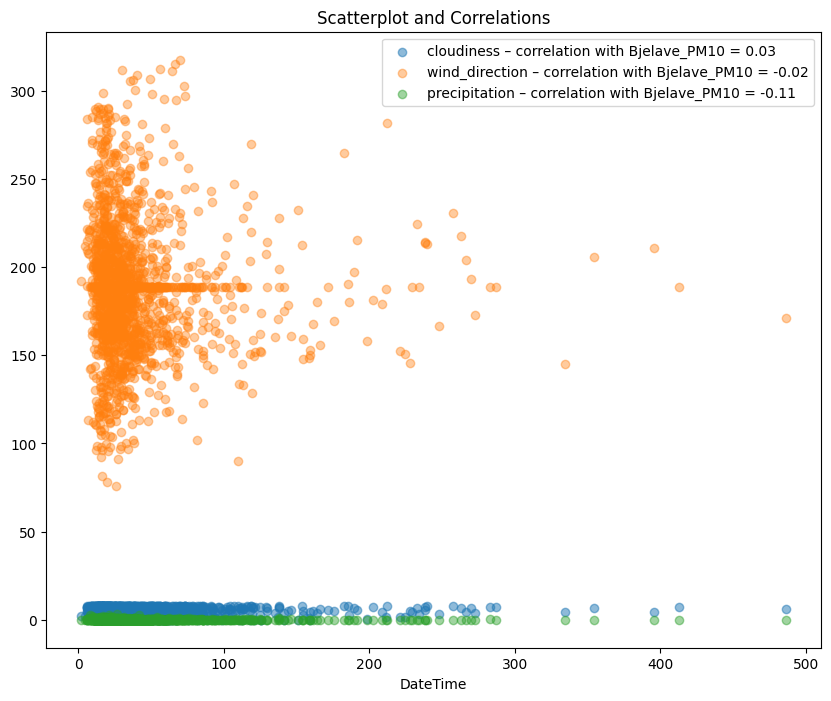

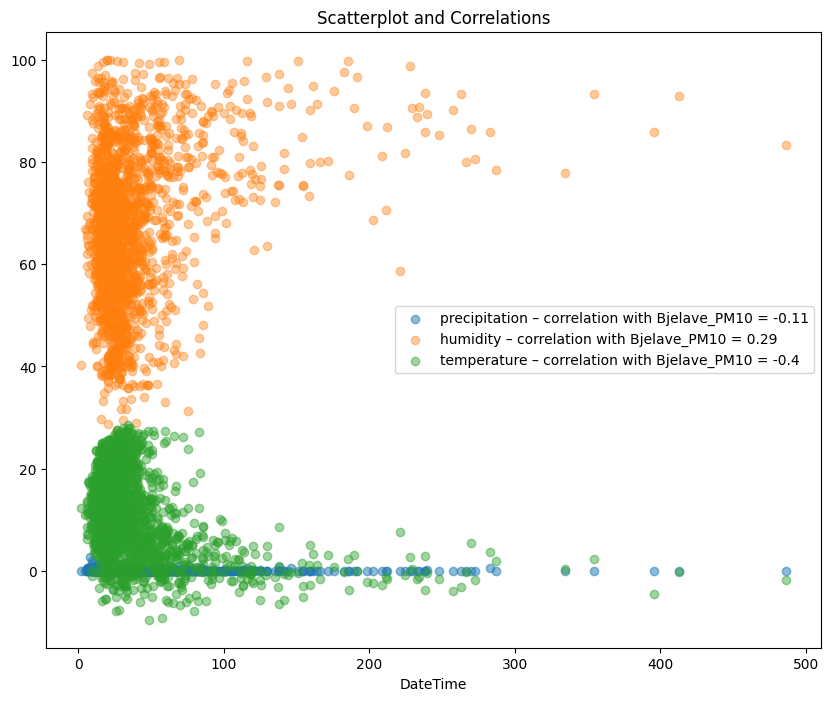

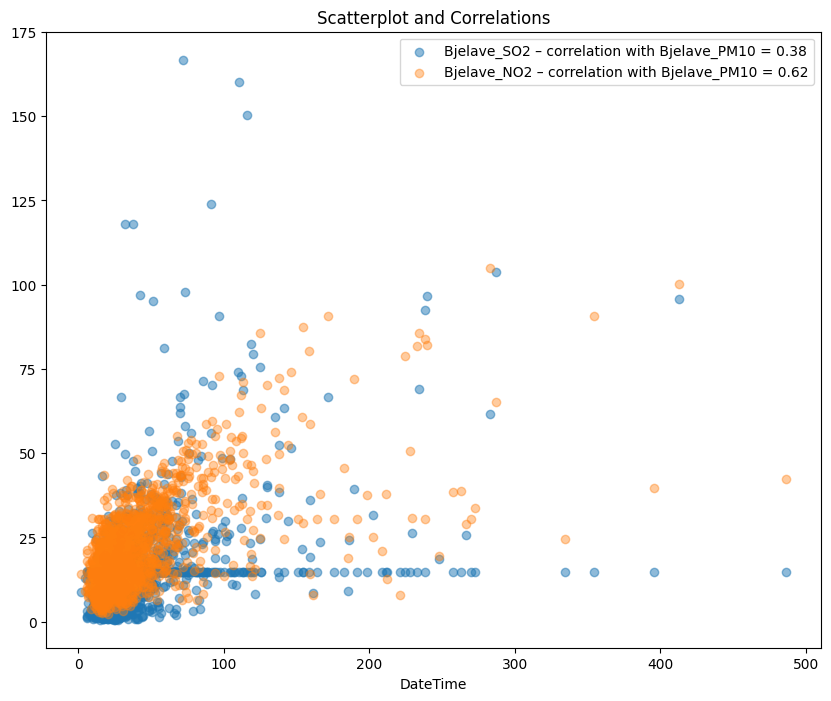

In [63]:
correlation_plot(df_processed_combined_data_daily_imputed_with_neighbors, 'Bjelave_PM10')
correlation_plot(df_processed_combined_data_daily_imputed_with_neighbors, 'Bjelave_PM10', 'cloudiness', 'wind_direction', 'precipitation')
correlation_plot(df_processed_combined_data_daily_imputed_with_neighbors, 'Bjelave_PM10', 'precipitation', 'humidity', 'temperature')
correlation_plot(df_processed_combined_data_daily_imputed_with_neighbors, 'Bjelave_PM10', 'Bjelave_SO2', 'Bjelave_NO2')


In [51]:
# Histogram and density
import seaborn as sns
def plot_hd_sim(df, label, color='#0F5257'):
  plt.figure(figsize=(8,5))
  sns.histplot(df[label], kde=True, bins=int(180/5), color=color, stat="density", kde_kws=dict(cut=3), alpha=.6, edgecolor=(1, 1, 1, .4));
  plt.tight_layout()
  plt.show()


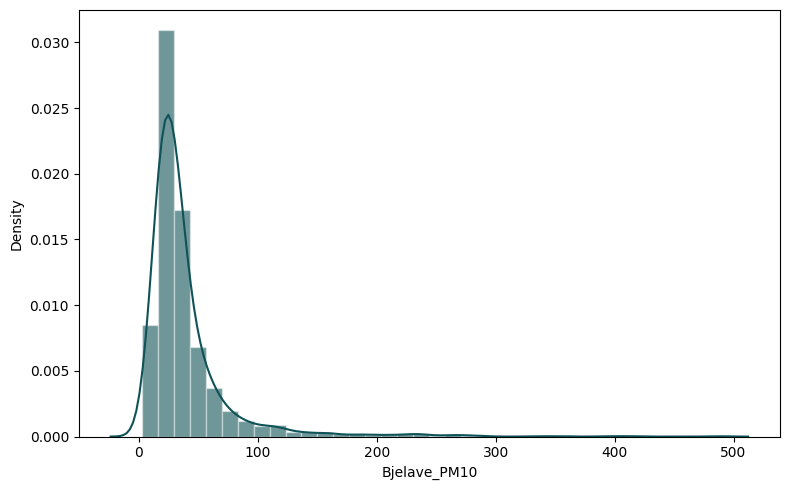

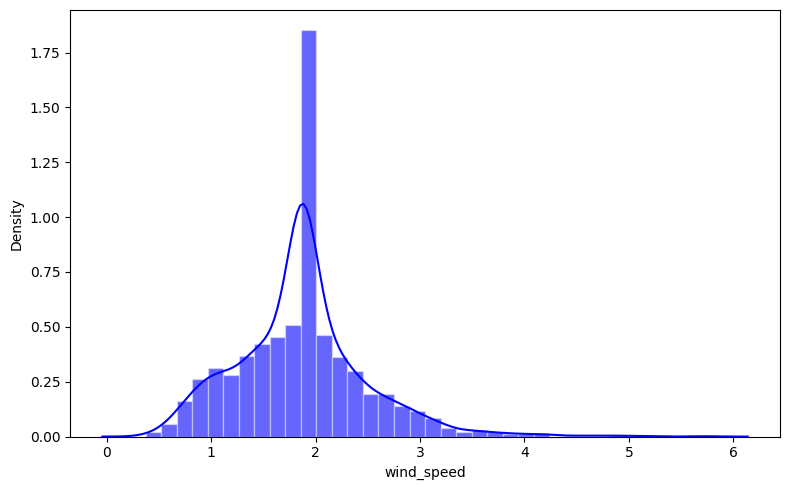

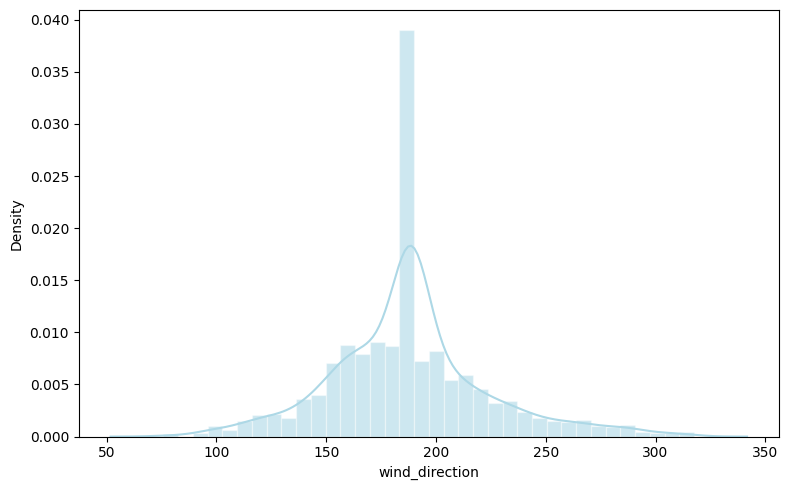

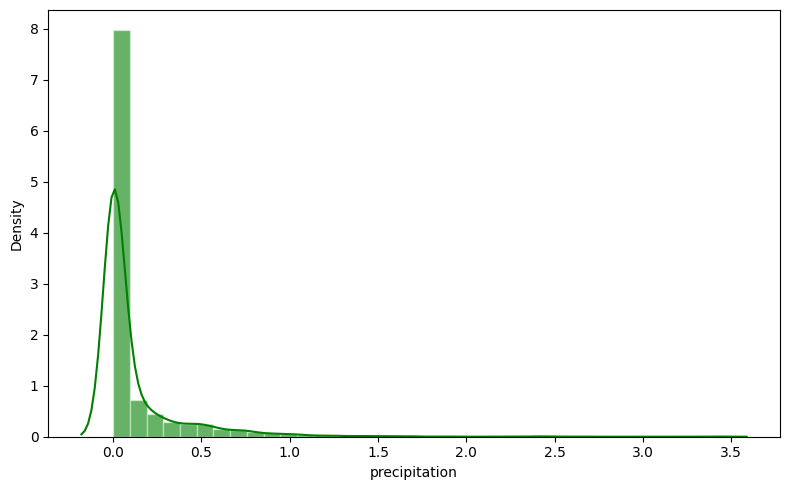

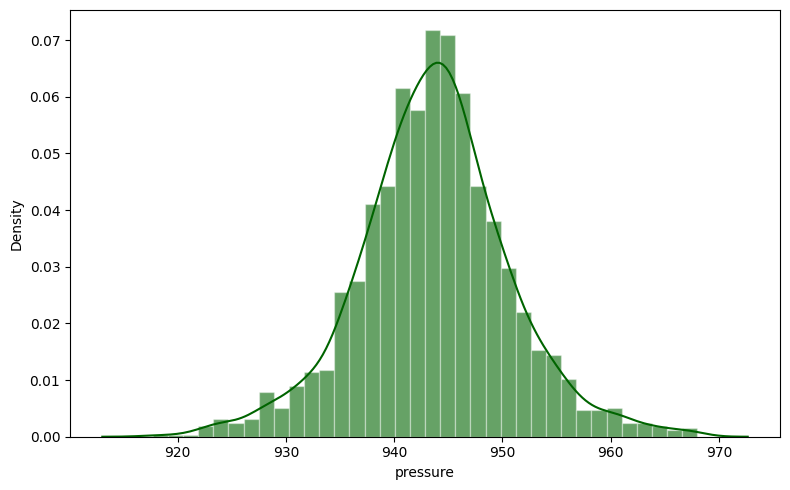

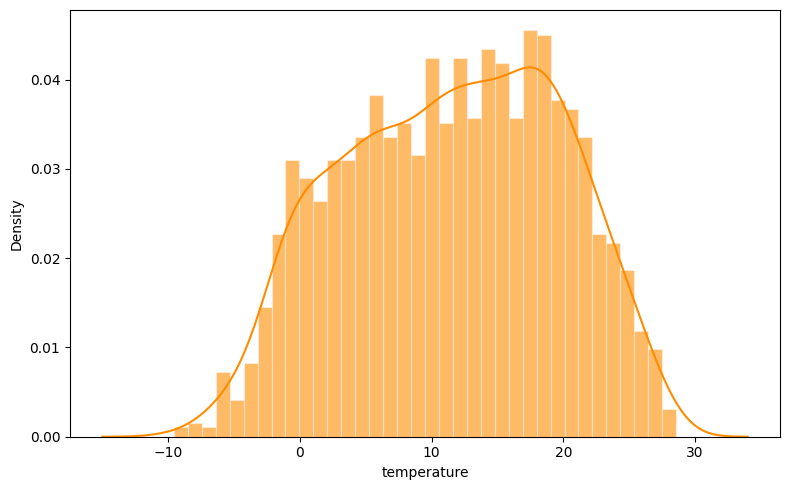

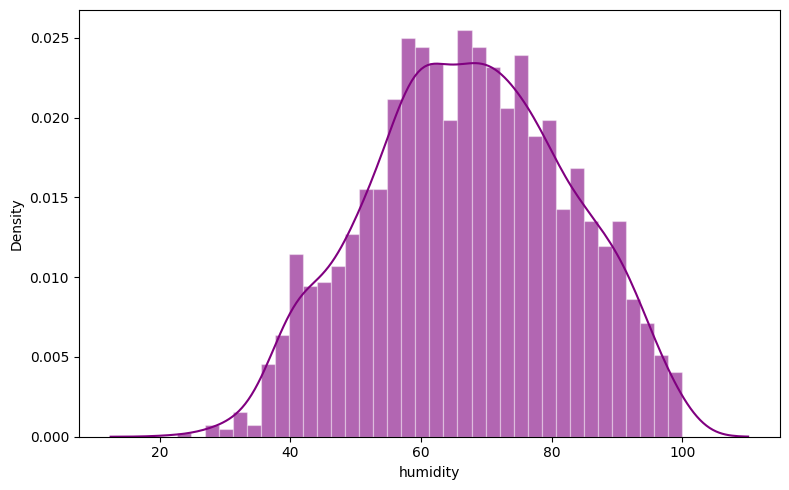

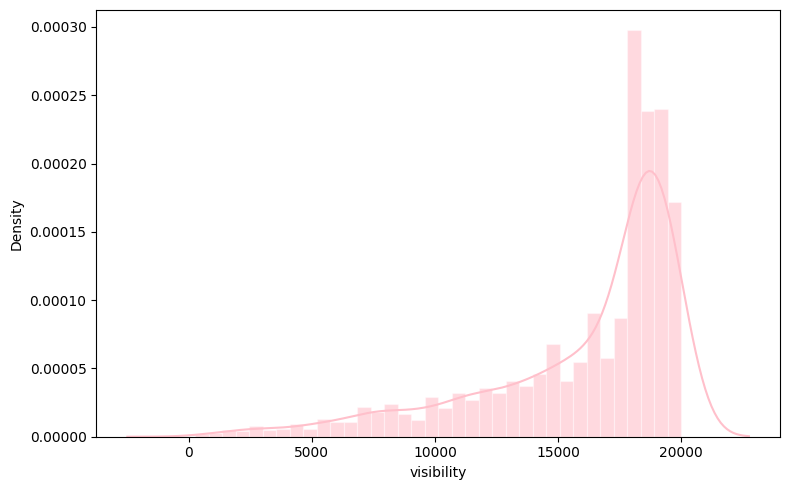

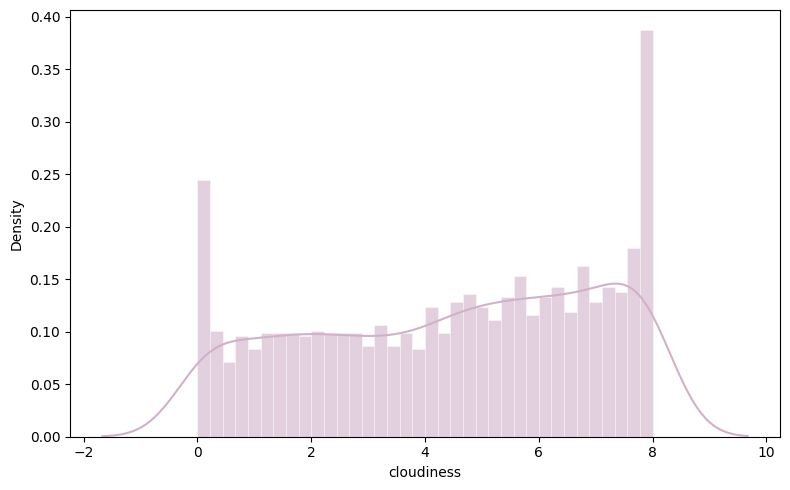

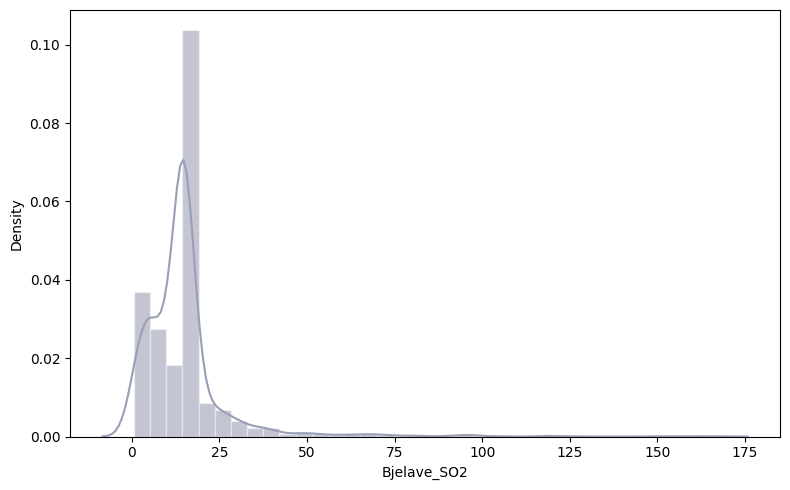

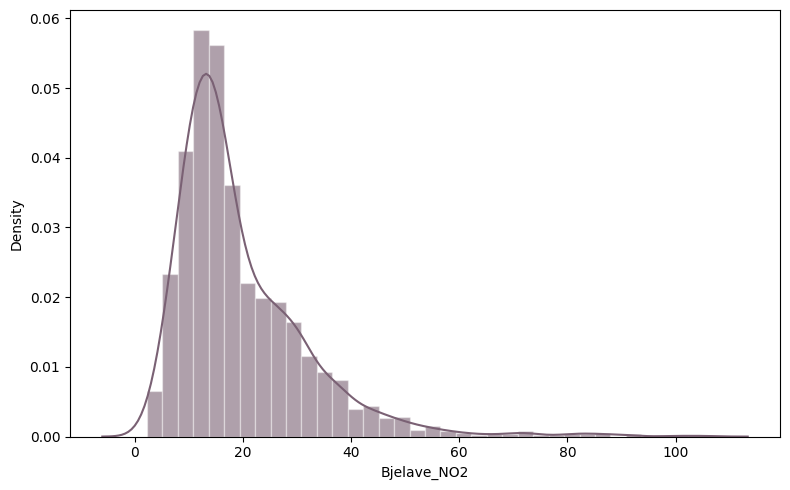

In [52]:
feature_columns.remove('DateTime')
for col, color in zip(feature_columns, colors):
        plot_hd_sim(df_processed_combined_data_daily_imputed_with_neighbors, col, color)
feature_columns.insert(0,'DateTime')
